In [96]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [24]:
pd.set_option('display.max_columns', None)

In [2]:
wego = pd.read_csv("../data/wego.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [16]:
# CLEANING NOTES & Qs
# Remove outliers? IQR or Z score? PREV_SCHED_STOP_CANCELLED
wego[['ADHERENCE', 'HDWY_DEV']].describe()

# Create headway % column
# Remove rows where all adjusted counts are 0? They're mostly NaN values in all columns.

,ADHERENCE,HDWY_DEV
count,338861.000000,265893.000000
mean,-3.188796,0.518081
std,6.898842,7.161798
min,-948.533333,-64.000000
25%,-4.566666,-2.316667
50%,-2.000000,0.033333
75%,-0.333333,2.483333
max,88.383333,565.433333


In [46]:
wego.sort_values('HDWY_DEV', ascending=False).head(20)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
269843,120230917,3,100025713,2023-09-17,23,2310,1927,350397,0,FROM DOWNTOWN,N1SP,3.0,0,36.175433,-86.774320,2023-09-17 18:01:00,2023-09-17 18:02:57,2023-09-17 18:02:57,-1.950000,25.0,590.433333,565.433333,0,0,1,0,0.0,0,0.000000,NaN
270201,120230917,3,100026077,2023-09-17,23,2313,2669,350602,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-17 17:06:00,2023-09-17 17:07:10,2023-09-17 17:07:10,-1.166666,25.0,568.833333,543.833333,0,0,1,0,1.0,0,0.000000,NaN
187826,120230902,2,100388181,2023-09-02,23,2311,2221,350443,0,FROM DOWNTOWN,N1SP,3.0,0,36.175433,-86.774320,2023-09-02 16:46:00,2023-09-02 16:49:34,2023-09-02 16:49:34,-3.566666,25.0,554.550000,529.550000,0,0,1,0,0.0,0,0.000000,NaN
53214,120230810,1,99715957,2023-08-10,22,2200,611,349957,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-08-10 16:44:00,2023-08-10 16:51:49,2023-08-10 16:51:49,-7.816666,50.0,558.700000,508.700000,0,1,0,0,0.0,0,0.000000,NaN
326698,120230927,1,100312968,2023-09-27,22,2200,2809,349957,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-09-27 16:44:00,2023-09-27 16:52:01,2023-09-27 16:52:01,-8.016666,50.0,555.233333,505.233333,0,1,0,0,0.0,0,0.000000,NaN
187823,120230902,2,100388178,2023-09-02,23,2311,2221,350442,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-02 16:16:00,2023-09-02 16:16:02,2023-09-02 16:16:02,-0.033333,25.0,523.066666,498.066666,0,0,1,1,1.0,0,0.000000,NaN
124778,120230822,1,100070737,2023-08-22,52,5218,2584,352309,0,TO DOWNTOWN,DCSCC,8.0,1,36.086817,-86.686874,2023-08-22 16:02:00,2023-08-22 15:30:45,2023-08-22 16:03:24,-1.400000,42.0,514.366666,472.366666,0,0,1,0,0.0,0,32.650000,NaN
262673,120230915,1,99982167,2023-09-15,52,5217,1394,352307,0,TO DOWNTOWN,DCSCC,8.0,1,36.086817,-86.686874,2023-09-15 15:20:00,2023-09-15 14:14:37,2023-09-15 15:19:02,0.966666,63.0,468.133333,405.133333,0,0,1,0,0.0,0,64.416666,NaN
141314,120230825,1,100168684,2023-08-25,23,2310,3120,350355,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-08-25 23:44:00,2023-08-27 00:12:48,2023-08-26 00:12:48,-28.800000,30.0,391.033333,361.033333,0,1,0,0,1.0,0,0.000000,NaN
227462,120230909,2,100580899,2023-09-09,52,5212,2138,352236,1,FROM DOWNTOWN,HCKP,9.0,0,36.048934,-86.713854,2023-09-10 00:27:00,2023-09-12 00:35:35,2023-09-11 00:35:35,-8.583333,29.0,284.783333,255.783333,0,1,0,0,1.0,0,0.000000,NaN


In [74]:
# Finding outliers with IQR... don't like this though, there are TOO MANY
data_adherence = wego['ADHERENCE']

Q1 = data_adherence.quantile(0.25)
Q3 = data_adherence.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_adherence = data_adherence[(data_adherence < lower_bound) | (data_adherence > upper_bound)].to_frame()

outliers_adherence

,ADHERENCE
3,6.283333
69,-12.583333
113,8.216666
114,-11.733333
116,-11.150000
...,...
350304,-18.616666
350322,-11.650000
350325,-11.300000
350327,-22.083333


In [49]:
# Attempting to calculate outliers with z score so that I have more control over the extremity of outliers, but not working
data_adherence = wego['ADHERENCE']

z_scores = stats.zscore(data_adherence)

z_score_threshold = 2

extreme_outliers = data_adherence[abs(z_scores) > z_score_threshold]

extreme_outliers.head()

Series([], Name: ADHERENCE, dtype: float64)

# Q1
### What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [75]:
# Percent of on-time stops - using all rows
round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego.shape[0]) * 100, 2)

77.08

In [76]:
# Percent of on-time stops - using only tagged rows
round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
                                               + wego['ADJUSTED_EARLY_COUNT'].sum() 
                                               + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

79.69

TypeError: 'str' object is not callable

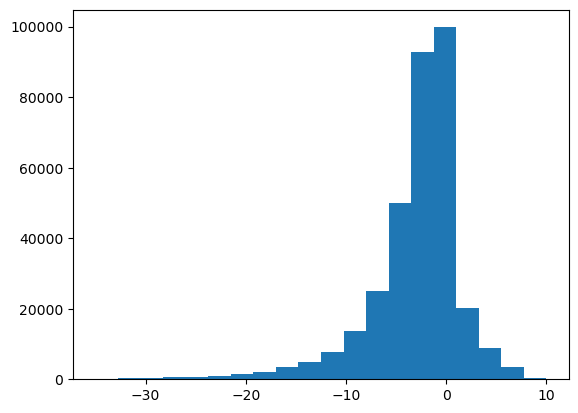

In [97]:
# Adherence distribution - removing non-visible outliers
plt.hist(wego.ADHERENCE, bins=20, range=(-35, 10))
plt.title('Frequency of WeGo Adherence Times')
plt.xlabel('Adherence Times')
plt.ylabel('Frequency')
plt.show() 

TypeError: 'str' object is not callable

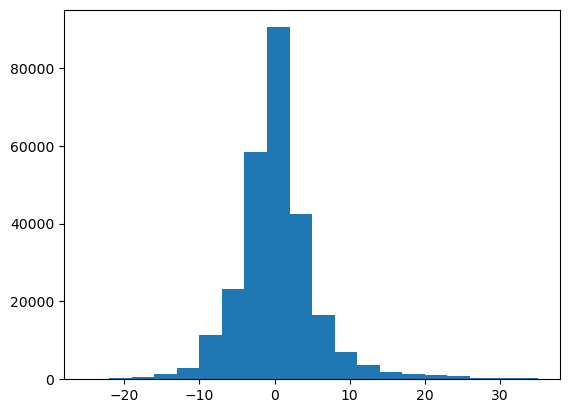

In [98]:
# Headway distribution - removing non-visible outliers
plt.hist(wego.HDWY_DEV, bins=20, range=(-25, 35))
plt.title('Frequency of WeGo Headway Times')
plt.xlabel('Adherence Times')
plt.ylabel('Frequency')
plt.show() 

# Q2
### How does direction of travel, route, or location affect the headway and on-time performance?